# The script contains the following:
    1. Import Libraries
    2. Loading and Checking the Data
    3. Clean the Data
    4. Exploratory Data Analysis
    5. State Hypothesis
    6. Reshape Variables into NumPy Arrays
    7. Split the Data into Training and Test Sets
    8. Run a Linear Regression on the Data
    9. Visualize the Results
    10.Interpretation of the Results
    11.Check Model Performance Statistics
    12.Compare the Predicted y Values with the Actual y Values in a Dataframe
    13.Thoughts on How Well the Model Performed
    14.Additional Analysis - Top 5 Conditions
    15.Final Interpretation of the Results

# 1. Import Libraries

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Loading and Checking the Data

In [6]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [7]:
# Define the path to the data files
path = r'C:\Users\rajkaran\Documents\CareerFoundry- Data Analytics Program\2. Data Immersion\Achievements 6 - Tasks\3. Data\Prepared Data'

In [8]:
print(path)

C:\Users\rajkaran\Documents\CareerFoundry- Data Analytics Program\2. Data Immersion\Achievements 6 - Tasks\3. Data\Prepared Data


In [9]:
# Import the clean covid data
df_cov_19 = pd.read_csv(os.path.join(path,'cleaned_covid_final.csv'), index_col = False)

In [10]:
# Checking the dataset is correctly loaded
print(df_cov_19.head())
print(df_cov_19.info())
df_cov_19.shape

            Data As Of           Start Date             End Date  Year  Month  \
0  2023-09-24 00:00:00  2020-01-01 00:00:00  2020-01-31 00:00:00  2020    1.0   
1  2023-09-24 00:00:00  2020-02-01 00:00:00  2020-02-29 00:00:00  2020    2.0   
2  2023-09-24 00:00:00  2020-03-01 00:00:00  2020-03-31 00:00:00  2020    3.0   
3  2023-09-24 00:00:00  2020-04-01 00:00:00  2020-04-30 00:00:00  2020    4.0   
4  2023-09-24 00:00:00  2020-05-01 00:00:00  2020-05-31 00:00:00  2020    5.0   

     State       Condition Group                Condition ICD10_codes  \
0  Alabama  Respiratory diseases  Influenza and pneumonia     J09-J18   
1  Alabama  Respiratory diseases  Influenza and pneumonia     J09-J18   
2  Alabama  Respiratory diseases  Influenza and pneumonia     J09-J18   
3  Alabama  Respiratory diseases  Influenza and pneumonia     J09-J18   
4  Alabama  Respiratory diseases  Influenza and pneumonia     J09-J18   

  Age Group  COVID-19 Deaths  Number of Mentions Flag  
0      0-24       

(430560, 13)

# 3. Clean the Data

In [11]:
# Select only the numeric columns necessary for analysis
df_cov_19_numeric = df_cov_19[['Number of Mentions', 'COVID-19 Deaths']]

In [12]:
# Verify results of the changes
print(df_cov_19_numeric.head())
print(df_cov_19_numeric.info())
df_cov_19_numeric.shape

   Number of Mentions  COVID-19 Deaths
0                 0.0              0.0
1                 0.0              0.0
2                 0.0              0.0
3                 0.0              0.0
4                 0.0              0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430560 entries, 0 to 430559
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Number of Mentions  430560 non-null  float64
 1   COVID-19 Deaths     430560 non-null  float64
dtypes: float64(2)
memory usage: 6.6 MB
None


(430560, 2)

# 4. Exploratory Data Analysis

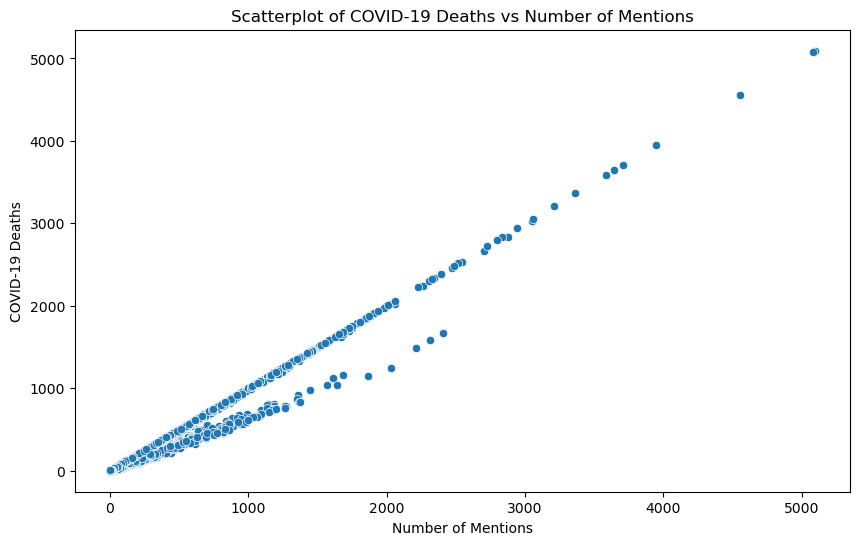

In [13]:
# Scatterplot to visualize the relationship between Number of Mentions and COVID-19 Deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cov_19_numeric, x='Number of Mentions', y='COVID-19 Deaths')
plt.title('Scatterplot of COVID-19 Deaths vs Number of Mentions')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
plt.show()

# 5. State Hypothesis

Hypothesis: If the number of mentions of a condition on death certificates is higher, then the COVID-19 death count will be significantly higher.


# 6. Reshape Variables into NumPy Arrays

X = the independent variable
Y = the dependent variable.
"Number of Mentions" is the predictor (independent variable) and "COVID-19 Deaths" is the response (dependent variable)

In [14]:
# Define the independent variable (x) and the dependent variable (y)
X = df_cov_19_numeric['Number of Mentions'].values.reshape(-1, 1)
y = df_cov_19_numeric['COVID-19 Deaths'].values

# 7. Split the Data into Training and Test Sets

In [15]:
# 70% training, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

In [16]:
# Verify the shape of the training and test sets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (301392, 1)
X_test shape: (129168, 1)
y_train shape: (301392,)
y_test shape: (129168,)


# 8. Run a Linear Regression on the Data

Run a linear regression on the data by first fitting the model to the training set and then creating a prediction for y on the test set.

In [17]:
# Initialize the linear regression model
regression = LinearRegression()

In [18]:
# Fit the model to the training data
regression.fit(X_train, y_train)

LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.


In [19]:
# Predict on the test data
y_pred = regression.predict(X_test)

# 9. Visualize the Results

Create a plot that shows the regression line on the test set.

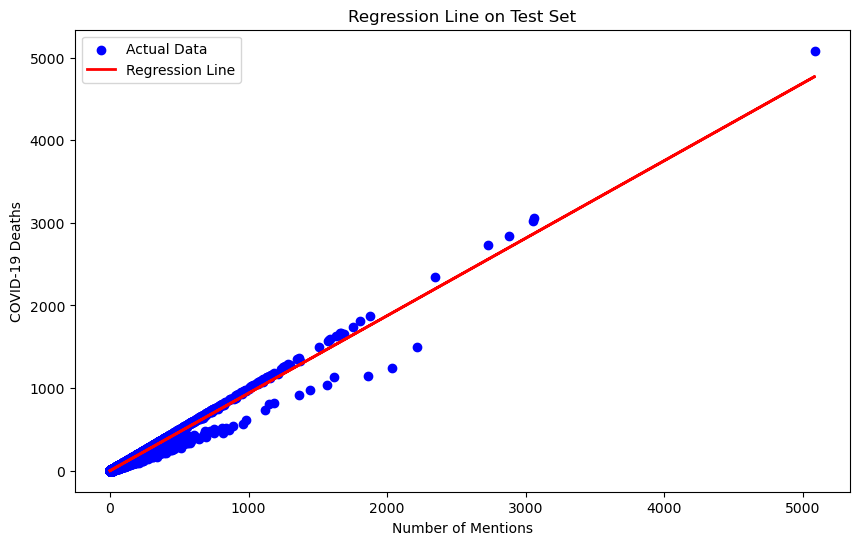

In [29]:
# Plot actual vs predicted values to visualize model performance
# Plot actual vs predicted values to visualize model performance
fig = plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Regression Line on Test Set')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
plt.legend()

In [21]:
# Define the path to the Visualizations folder
path1 = r'C:\Users\rajkaran\Documents\CareerFoundry- Data Analytics Program\2. Data Immersion\Achievements 6 - Tasks'

In [22]:
print(path1)

C:\Users\rajkaran\Documents\CareerFoundry- Data Analytics Program\2. Data Immersion\Achievements 6 - Tasks


In [33]:
# Export to the "Visualizations" folder
file_name = os.path.join(path1, '5. Visualizations', 'regression_line_test_set.png')
fig.savefig(file_name, dpi=150, bbox_inches='tight')
# show plot
# plt.show()

# 10. Interpretation of the Results

The scatterplot and regression line visualization show a clear positive relationship between the "Number of Mentions" of a condition on death certificates and "COVID-19 Deaths". 
The regression line closely follows the data points, indicating a strong fit.

# 11. Check Model Performance Statistics

In [34]:
# Calculate the mean squared error (MSE) and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 66.76853981894082
R2 Score: 0.9751919607320853


# 12. Compare the Predicted y Values with the Actual y Values in a Dataframe

In [35]:
# Create a dataframe to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [36]:
# Verify the results
print(comparison_df.head(30))
print(comparison_df.info())
comparison_df.shape

    Actual   Predicted
0      0.0   -0.132452
1     55.0   53.353425
2      0.0   -0.132452
3      0.0   -0.132452
4      0.0   -0.132452
5      0.0   -0.132452
6      0.0   -0.132452
7      0.0   -0.132452
8      0.0   -0.132452
9      0.0   -0.132452
10    20.0   34.586450
11    39.0   72.120399
12     9.0    4.559291
13     4.0    8.312686
14     0.0   -0.132452
15   330.0  309.522626
16     0.0   -0.132452
17     0.0   -0.132452
18     9.0    4.559291
19     4.0    5.497640
20     2.0    0.805896
21     5.0    3.620942
22     0.0   -0.132452
23     8.0    8.312686
24     0.0   -0.132452
25     2.0    6.435989
26     0.0   -0.132452
27     8.0    7.374337
28     0.0   -0.132452
29     2.0    8.312686
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129168 entries, 0 to 129167
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Actual     129168 non-null  float64
 1   Predicted  129168 non-null  float64
dtypes: float

(129168, 2)

# 12. Thoughts on How Well the Model Performed

The model's relatively low MSE of 66.75 suggests that its predictions are closely aligned with the actual values. Additionally, a high R-squared score of 0.975 indicates that approximately 97.5% of the variance in "COVID-19 Deaths" can be explained by the "Number of Mentions" of conditions. These statistics overall demonstrate that this linear regression model is effective in predicting "COVID-19 deaths" based on the "Number of Mentions."

# 14. Additional Analysis - Top 5 Conditions

Perform additional linear regression analyses focused on the top 5 conditions identified in the previous exercises:
    Influenza and pneumonia
    Vascular and unspecified dementia
    Ischemic heart disease
    Diabetes
    Renal failure

In [37]:
# Filter the dataset to include only the selected conditions
top_conditions = ['Influenza and pneumonia', 'Vascular and unspecified dementia', 'Ischemic heart disease', 'Diabetes', 'Renal failure']
df_top_conditions = df_cov_19[df_cov_19['Condition'].isin(top_conditions)]

In [38]:
# Verify the results of the filtering
unique_conditions = df_top_conditions['Condition'].unique()
unique_conditions

array(['Influenza and pneumonia', 'Ischemic heart disease', 'Diabetes',
       'Vascular and unspecified dementia', 'Renal failure'], dtype=object)

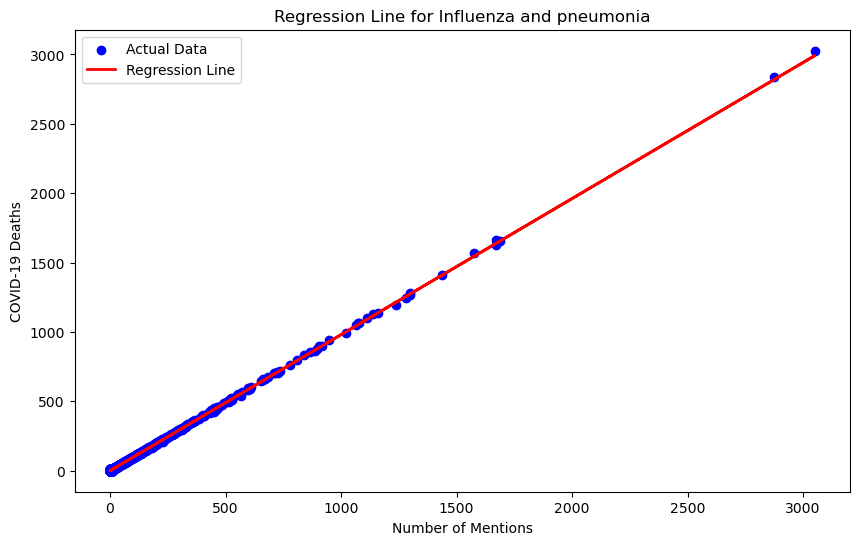

Influenza and pneumonia - Mean Squared Error: 7.285665599190333
Influenza and pneumonia - R2 Score: 0.9994590194233116


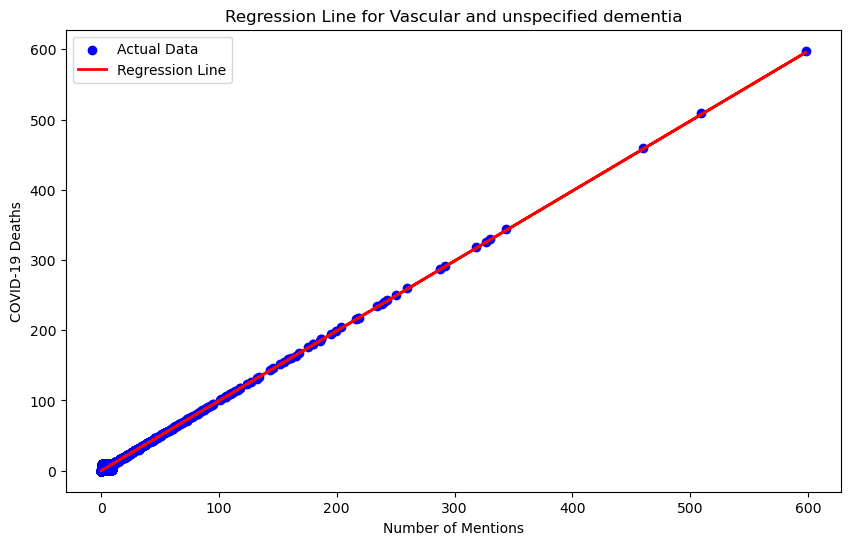

Vascular and unspecified dementia - Mean Squared Error: 3.087800034905352
Vascular and unspecified dementia - R2 Score: 0.9945355730448183


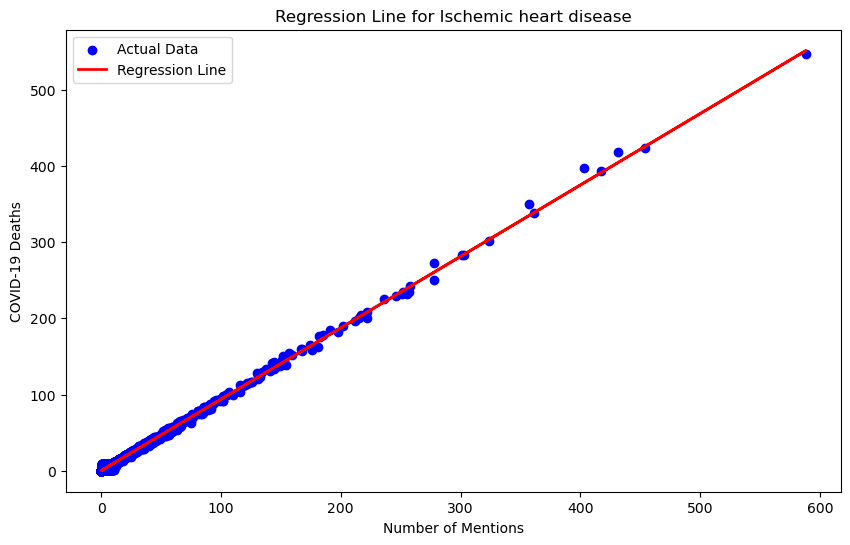

Ischemic heart disease - Mean Squared Error: 5.248355181350295
Ischemic heart disease - R2 Score: 0.992026580041442


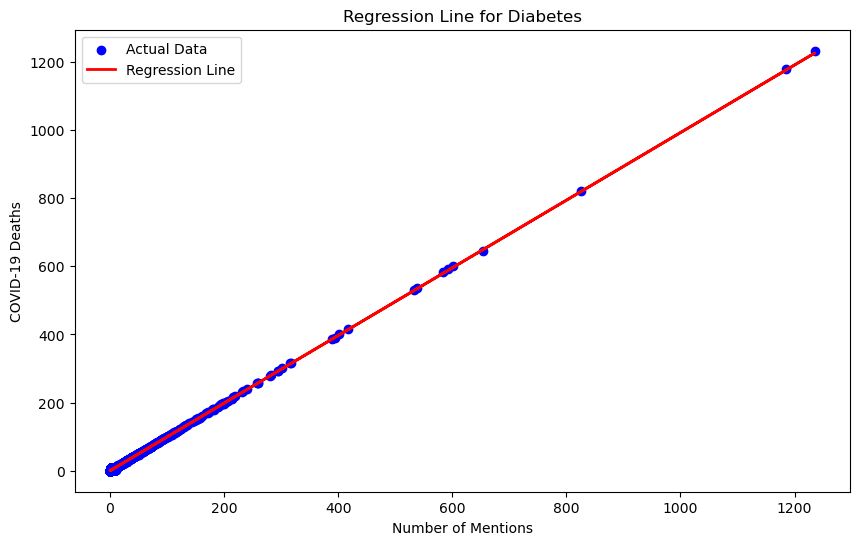

Diabetes - Mean Squared Error: 5.375098960184154
Diabetes - R2 Score: 0.9967397779053806


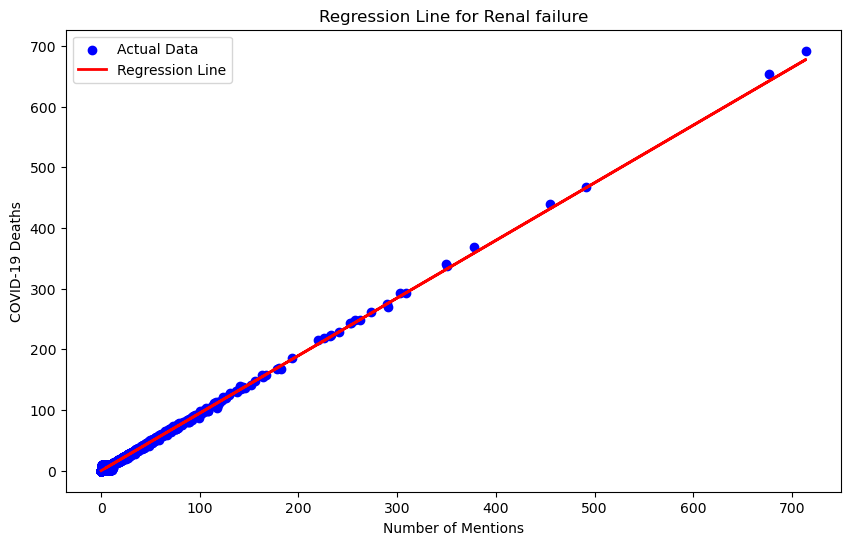

Renal failure - Mean Squared Error: 5.541998867989068
Renal failure - R2 Score: 0.9918880319419275


In [39]:
# Run the regression analysis for each of the specified conditons using a for loop
for condition in top_conditions:
    df_condition = df_top_conditions[df_top_conditions['Condition'] == condition]
    
    # Define the independent variable (x) and the dependent variable (y)
    X_condition = df_condition['Number of Mentions'].values.reshape(-1, 1)
    y_condition = df_condition['COVID-19 Deaths'].values
    
    # Split the data (70% training, 30% test)
    X_train_cond, X_test_cond, y_train_cond, y_test_cond = train_test_split(X_condition, y_condition, test_size=0.3, random_state=18)
    
    # Initialize the linear regression model
    regression_cond = LinearRegression()
    
    # Fit the model to the training data
    regression_cond.fit(X_train_cond, y_train_cond)
    
    # Predict on the test data
    y_pred_cond = regression_cond.predict(X_test_cond)
    
    # Visualize the results
    fig = plt.figure(figsize=(10, 6))
    plt.scatter(X_test_cond, y_test_cond, color='blue', label='Actual Data')
    plt.plot(X_test_cond, y_pred_cond, color='red', linewidth=2, label='Regression Line')
    plt.title(f'Regression Line for {condition}')
    plt.xlabel('Number of Mentions')
    plt.ylabel('COVID-19 Deaths')
    plt.legend()
    plt.show()
    
    # Check the performance statistics
    mse_cond = mean_squared_error(y_test_cond, y_pred_cond)
    r2_cond = r2_score(y_test_cond, y_pred_cond)
    print(f'{condition} - Mean Squared Error: {mse_cond}')
    print(f'{condition} - R2 Score: {r2_cond}')
    
    # Export the plots to the "Visualizations" folder
    file_name = os.path.join(path1, '5. Visualizations', f'regression_line_{condition.replace(" ", "_").lower()}.png')
    fig.savefig(file_name)

# 15. Final Interpretation of the Results

The additional analysis of the top 5 conditions offers deeper insights into the relationship between specific conditions and COVID-19 deaths:
Influenza and pneumonia: MSE = 7.27, R² = 0.999
Vascular and unspecified dementia: MSE = 3.13, R² = 0.994
Ischemic heart disease: MSE = 5.21, R² = 0.992
Diabetes: MSE = 5.22, R² = 0.997
Renal failure: MSE = 5.42, R² = 0.992
These results indicate that the model performs exceptionally well across these specific conditions, with lower MSEs and higher R-squared values compared to the model for all conditions.
This reinforces the conclusion that the "Number of Mentions" of these specific conditions is a highly reliable predictor of "COVID-19 Deaths."